# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [21]:
# Your code here.
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns

student_data = pd.DataFrame({'x': [17,51,27,21,36,48,19,26,54,30], 'y': [10,1,5,9,4,2,9,6,0,3]})

In [9]:
student_data

,x,y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

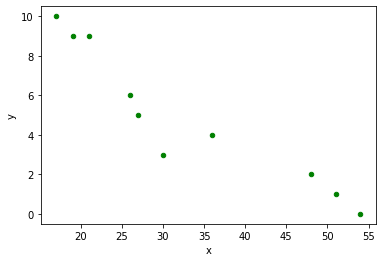

In [16]:
# Your code here.
student_data.plot.scatter('x', 'y', color='green')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [18]:
# Your response here.

#correlation:

#student_data[['x', 'y']].corr()

print(np.corrcoef(x, y))  # Our correlation is negative and close to 1 -> 0.93 means that there is a strong correlation




#covariance:

#student_data[['x', 'y']].cov()

print(np.cov(x,y))  # The covariance determines the direction of the linear relationship, Age is increasing while Tardies is decreasing

[[ 1.         -0.93916269]
 [-0.93916269  1.        ]]
[[187.65555556 -45.56666667]
 [-45.56666667  12.54444444]]


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [37]:
# Your response here.

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(slope)  # -> is a
print(intercept)  #  -> is b
print(r_value)
print(p_value)
print(std_err)

# y=a*x+b  ----> y = (-0.24)*x + 12.89

-0.2428207709159808
12.888803363135768
-0.9391626886887121
5.56665383455343e-05
0.03139728816158607


The outcome variable is also called the response or dependent variable, and the risk factors and confounders are called the predictors, or explanatory or independent variables. In this linear regression analysis, the dependent variable is denoted "y" and the independent variables are denoted by "x". 

Plot your regression model on your scatter plot.

[Text(0, 0.5, 'Minutes late'), Text(0.5, 0, 'Age')]

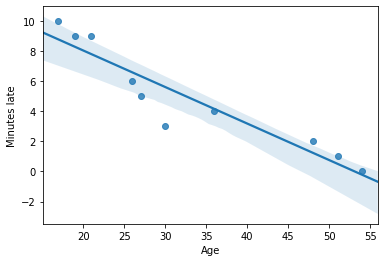

In [38]:
# Your code here.
fig = sns.regplot('x', 'y', data=student_data)
fig.set(xlabel='Age', ylabel='Minutes late')

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [49]:
# Import any libraries you may need & the data
import matplotlib.pyplot as plt

data = pd.read_csv('vehicles.csv')
data.head(10)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
5,Acura,2.2CL/3.0CL,1997,2.2,4.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,14.982273,20,26,22,403.954545,1500
6,Acura,2.2CL/3.0CL,1997,2.2,4.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,13.733750,22,28,24,370.291667,1400
7,Acura,2.2CL/3.0CL,1997,3.0,6.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,16.480500,18,26,20,444.350000,1650
8,Acura,2.3CL/3.0CL,1998,2.3,4.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,14.982273,19,27,22,403.954545,1500
9,Acura,2.3CL/3.0CL,1998,2.3,4.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,13.733750,21,29,24,370.291667,1400


In [50]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [51]:
# Your response here. 
df = data[['Year','Cylinders','Fuel Barrels/Year','Combined MPG', 'Fuel Cost/Year']]
df.head(10)

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
0,1984,4.0,19.388824,17,1950
1,1984,6.0,25.354615,13,2550
2,1985,4.0,20.600625,16,2100
3,1985,6.0,25.354615,13,2550
4,1987,6.0,20.600625,16,2550
5,1997,4.0,14.982273,22,1500
6,1997,4.0,13.733750,24,1400
7,1997,6.0,16.480500,20,1650
8,1998,4.0,14.982273,22,1500
9,1998,4.0,13.733750,24,1400


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

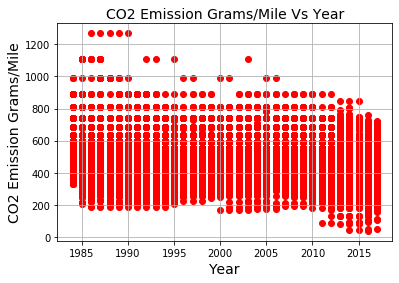

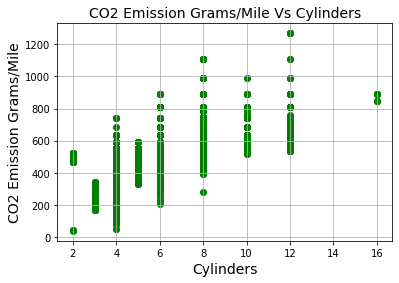

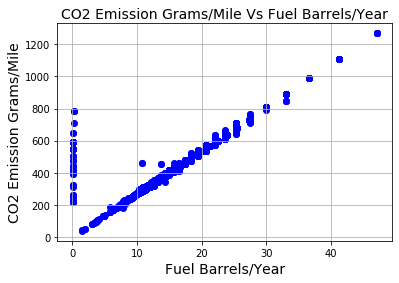

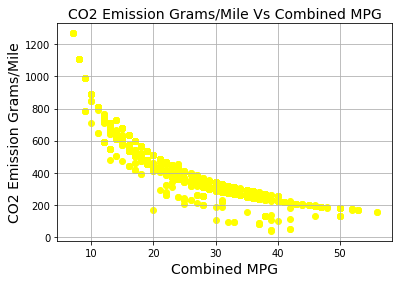

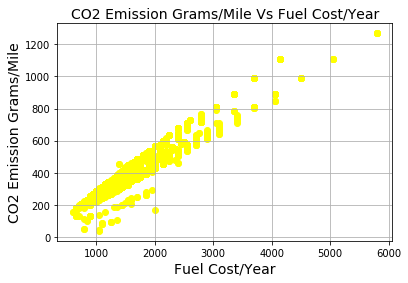

In [55]:
# Checking for Linearity  - predict vehicles' CO2 emissions based on several independent variables

# x = 'Year','Cylinders','Fuel Barrels/Year','Combined MPG', 'Fuel Cost/Year'
# y = 'CO2 Emission Grams/Mile'

plt.scatter(data['Year'], data['CO2 Emission Grams/Mile'], color='red')
plt.title('CO2 Emission Grams/Mile Vs Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO2 Emission Grams/Mile', fontsize=14)
plt.grid(True)
plt.show()
 
plt.scatter(data['Cylinders'], data['CO2 Emission Grams/Mile'], color='green')
plt.title('CO2 Emission Grams/Mile Vs Cylinders', fontsize=14)
plt.xlabel('Cylinders', fontsize=14)
plt.ylabel('CO2 Emission Grams/Mile', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(data['Fuel Barrels/Year'], data['CO2 Emission Grams/Mile'], color='blue')
plt.title('CO2 Emission Grams/Mile Vs Fuel Barrels/Year', fontsize=14)
plt.xlabel('Fuel Barrels/Year', fontsize=14)
plt.ylabel('CO2 Emission Grams/Mile', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(data['Combined MPG'], data['CO2 Emission Grams/Mile'], color='yellow')
plt.title('CO2 Emission Grams/Mile Vs Combined MPG', fontsize=14)
plt.xlabel('Combined MPG', fontsize=14)
plt.ylabel('CO2 Emission Grams/Mile', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(data['Fuel Cost/Year'], data['CO2 Emission Grams/Mile'], color='yellow')
plt.title('CO2 Emission Grams/Mile Vs Fuel Cost/Year', fontsize=14)
plt.xlabel('Fuel Cost/Year', fontsize=14)
plt.ylabel('CO2 Emission Grams/Mile', fontsize=14)
plt.grid(True)
plt.show()

In [74]:
from sklearn.linear_model import LinearRegression

x = df
y = data[['CO2 Emission Grams/Mile']]  # dependent variable
lm = LinearRegression()
model = lm.fit(x,y)

print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)

predictions=lm.predict(x)

Intercept:  [769.88828365]
Coef:  [[-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]]


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [73]:
# Your response here. 

import statsmodels.api as sm

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x,y)


# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Wed, 13 Nov 2019   Prob (F-statistic):               0.00
Time:                             15:45:31   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

C:\Users\const\Anaconda3\envs\ironhack\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [ ]:
R-squared determines how well a regression model makes predictions 
- this seems to be a good regression model 
There is no correlation between the variables 

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [75]:
# Your code here.

party_people = pd.DataFrame({'x': [1,3,4,6,8,9,11,14], 'y': [1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

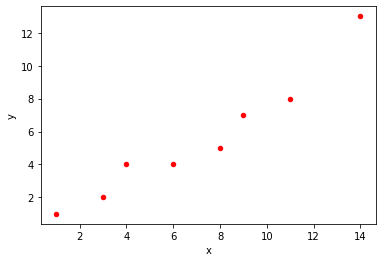

In [77]:
# Your code here.

party_people.plot.scatter('x', 'y', color='red')

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [80]:
print(party_people[['x','y']].corr())
print(party_people[['x','y']].cov())

         x        y
x  1.00000  0.96523
y  0.96523  1.00000
           x          y
x  18.857143  16.000000
y  16.000000  14.571429


[Text(0, 0.5, 'Attended'), Text(0.5, 0, 'Invited')]

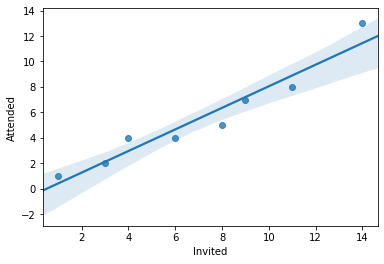

In [81]:
fig = sns.regplot('x','y', data=party_people)
fig.set(xlabel='Invited', ylabel='Attended')

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

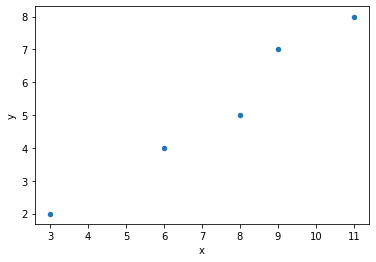

In [88]:
# Your response here. 
party_people2 = pd.DataFrame({'x': [3,6,8,9,11], 'y': [2,4,5,7,8]})
party_people2.plot.scatter('x','y')

In [89]:
print(party_people2[['x','y']].corr())
print(party_people2[['x','y']].cov())

          x         y
x  1.000000  0.982035
y  0.982035  1.000000
      x     y
x  9.30  7.15
y  7.15  5.70


[Text(0, 0.5, 'Attended'), Text(0.5, 0, 'Invited')]

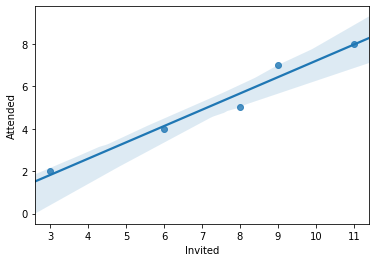

In [90]:
fig = sns.regplot('x','y', data=party_people2)
fig.set(xlabel='Invited', ylabel='Attended')

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?